In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import neurokit2 as nk

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from hmmlearn import hmm

In [2]:
thmm_to_results = pd.read_csv('../results-tot-thmm.csv')
thmm_to_results.head()

,TOT,Feature Type,Window Size,Step Size,Components Slow,Mixtures Slow,Components Fast,Mixtures Fast,Covariance Type,Mean Accuracy,Standard Deviation,Max Accuracy,Min Accuracy,True Positives,False Positives,True Negatives,False Negatives,Precision,Recall,F1 Score
0,3,Relevant Features,3s,3s,1,1,1,1,full,0.629877,0.039079,0.728395,0.543210,19.0,14.0,40.0,8.0,0.575758,0.703704,0.633333
1,3,Relevant Features,3s,3s,1,1,1,1,diag,0.590617,0.042291,0.679012,0.395062,12.0,21.0,43.0,5.0,0.363636,0.705882,0.480000
2,3,Relevant Features,3s,3s,1,1,1,1,spherical,0.566049,0.041478,0.679012,0.456790,12.0,21.0,43.0,5.0,0.363636,0.705882,0.480000
3,3,Relevant Features,3s,3s,1,1,1,2,full,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Relevant Features,3s,3s,1,1,1,2,diag,0.428889,0.055504,0.629630,0.395062,16.0,17.0,35.0,13.0,0.484848,0.551724,0.516129


In [3]:
top_10 = thmm_to_results.sort_values("Max Accuracy", ascending=False).head(10)
top_10.reset_index(drop=True, inplace=True)
top_10["Window Size"] = pd.to_timedelta(top_10["Window Size"]).dt.total_seconds()
top_10["Step Size"] = pd.to_timedelta(top_10["Step Size"]).dt.total_seconds()
top_10["Covariance Type"] = top_10["Covariance Type"].replace({"diag": "Diagonal", "full": "Full", "spherical": "Spherical"})
top_10

,TOT,Feature Type,Window Size,Step Size,Components Slow,Mixtures Slow,Components Fast,Mixtures Fast,Covariance Type,Mean Accuracy,Standard Deviation,Max Accuracy,Min Accuracy,True Positives,False Positives,True Negatives,False Negatives,Precision,Recall,F1 Score
0,3,Relevant Features,3.0,3.0,1,1,1,1,Full,0.629877,0.039079,0.728395,0.543210,19.0,14.0,40.0,8.0,0.575758,0.703704,0.633333
1,3,Relevant Features,0.1,0.1,2,1,2,1,Diagonal,0.553827,0.055240,0.728395,0.407407,23.0,10.0,36.0,12.0,0.696970,0.657143,0.676471
2,3,Relevant Features,0.1,0.1,4,1,2,2,Spherical,0.539506,0.052712,0.728395,0.432099,22.0,11.0,37.0,11.0,0.666667,0.666667,0.666667
3,3,Relevant Features,0.1,0.1,4,3,2,4,Spherical,0.547160,0.052491,0.728395,0.407407,21.0,12.0,38.0,10.0,0.636364,0.677419,0.656250
4,3,Relevant Features,0.5,0.5,2,3,4,1,Spherical,0.559630,0.049137,0.728395,0.444444,19.0,14.0,40.0,8.0,0.575758,0.703704,0.633333
5,3,Relevant Features,0.5,0.5,2,1,1,4,Spherical,0.531605,0.053124,0.728395,0.432099,24.0,9.0,35.0,13.0,0.727273,0.648649,0.685714
6,3,Relevant Features,1.0,1.0,1,1,1,1,Full,0.604444,0.048602,0.728395,0.456790,22.0,11.0,37.0,11.0,0.666667,0.666667,0.666667
7,3,Relevant Features,1.0,0.5,1,1,1,1,Full,0.603457,0.048645,0.716049,0.481481,19.0,14.0,39.0,9.0,0.575758,0.678571,0.622951
8,3,Relevant Features,3.0,1.0,1,3,2,1,Spherical,0.572099,0.044142,0.716049,0.456790,20.0,13.0,38.0,10.0,0.606061,0.666667,0.634921
9,3,Relevant Features,0.1,0.1,1,1,1,1,Full,0.602840,0.045194,0.716049,0.469136,23.0,10.0,35.0,13.0,0.696970,0.638889,0.666667


In [4]:
top_10.to_csv("thmm-tot-top-10.csv", index=False)

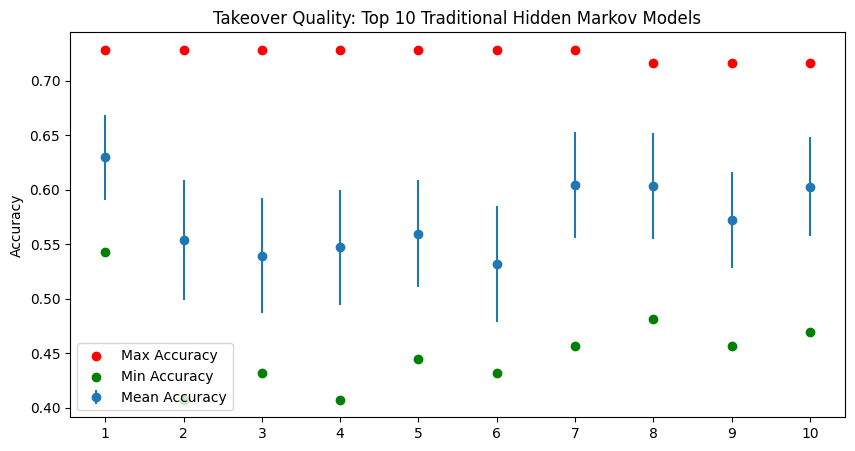

In [5]:
# Plot mean accuracy, std deviation, and max accuracy for the top 10 models
std = top_10["Standard Deviation"]
mean = top_10["Mean Accuracy"]
max_acc = top_10["Max Accuracy"]
min_acc = top_10["Min Accuracy"]
model = top_10.index + 1

plt.figure(figsize=(10, 5))
plt.errorbar(model, mean, yerr=std, fmt='o', label="Mean Accuracy")
plt.scatter(model, max_acc, color='red', label="Max Accuracy")
plt.scatter(model, min_acc, color='green', label="Min Accuracy")
plt.xticks(model)
plt.xlabel("")
plt.ylabel("Accuracy")
plt.title("Takeover Quality: Top 10 Traditional Hidden Markov Models")
plt.legend()
plt.show()

hyperparameter optimization ^

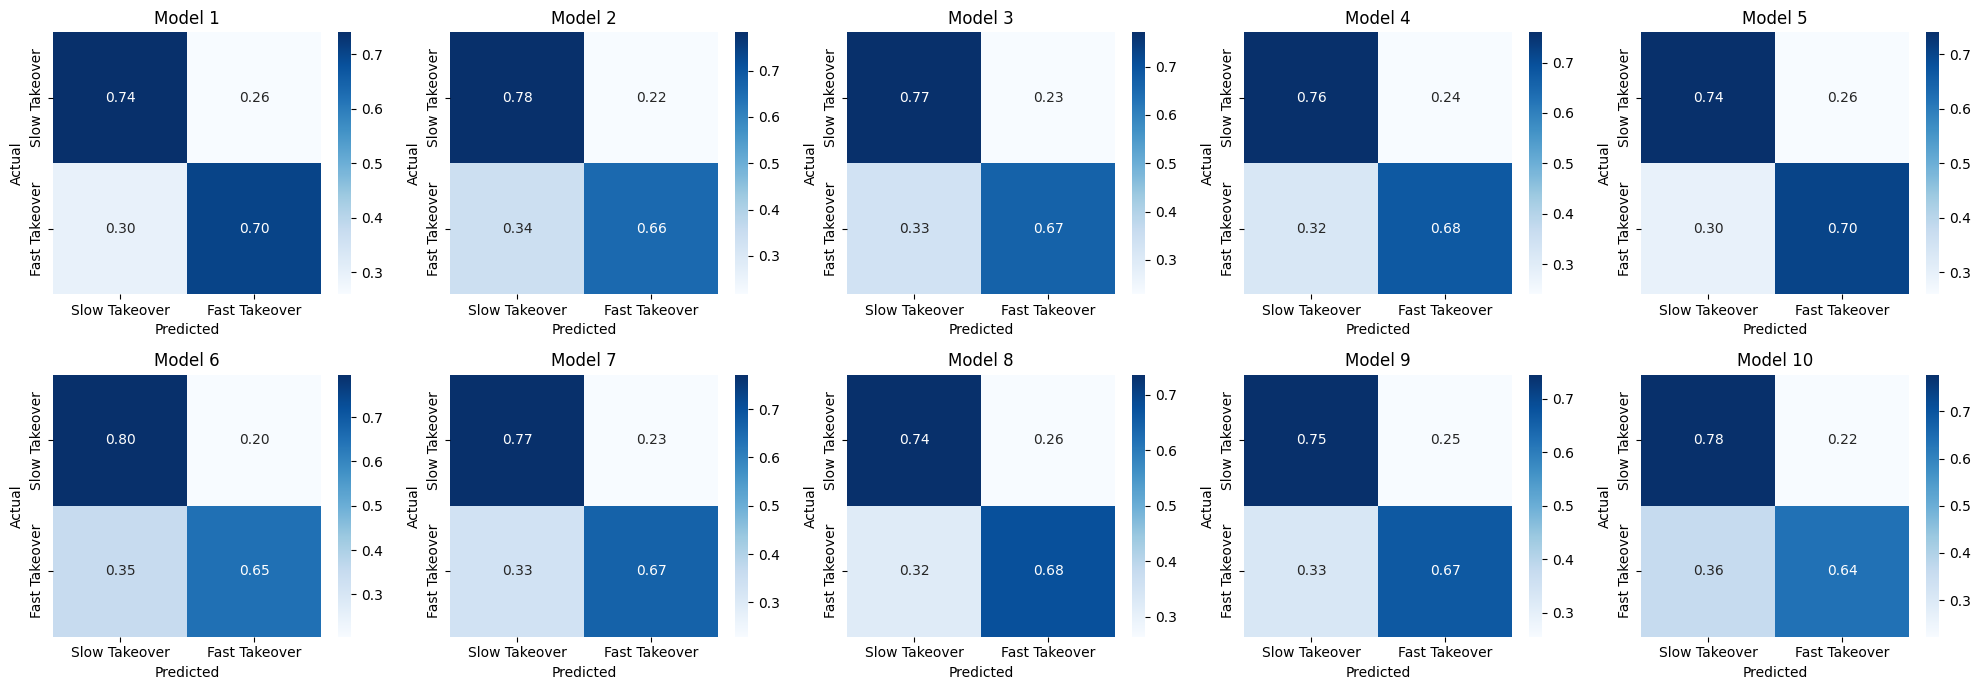

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))

for i, ax in enumerate(axes.flatten()):
    model = top_10.iloc[i]
    tp = model["True Positives"]
    tn = model["True Negatives"]
    fp = model["False Positives"]
    fn = model["False Negatives"]
    confusion = np.array([[tn, fp], [fn, tp]])
    sns.heatmap(confusion / confusion.sum(axis=1)[:, np.newaxis], annot=True, fmt='.2f', cmap='Blues', ax=ax)
    ax.set_title(f"Model {i + 1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticklabels(["Slow Takeover", "Fast Takeover"])
    ax.set_yticklabels(["Slow Takeover", "Fast Takeover"])

plt.tight_layout()
plt.show()


In [7]:
top_10[
    [
        "Window Size",
        "Step Size",
        "Components Slow",
        "Mixtures Slow",
        "Components Fast",
        "Mixtures Fast",
        "Covariance Type",
        "Mean Accuracy",
        "Max Accuracy",
        "Precision",
        "Recall",
        "F1 Score",
    ]
]

,Window Size,Step Size,Components Slow,Mixtures Slow,Components Fast,Mixtures Fast,Covariance Type,Mean Accuracy,Max Accuracy,Precision,Recall,F1 Score
0,3.0,3.0,1,1,1,1,Full,0.629877,0.728395,0.575758,0.703704,0.633333
1,0.1,0.1,2,1,2,1,Diagonal,0.553827,0.728395,0.696970,0.657143,0.676471
2,0.1,0.1,4,1,2,2,Spherical,0.539506,0.728395,0.666667,0.666667,0.666667
3,0.1,0.1,4,3,2,4,Spherical,0.547160,0.728395,0.636364,0.677419,0.656250
4,0.5,0.5,2,3,4,1,Spherical,0.559630,0.728395,0.575758,0.703704,0.633333
5,0.5,0.5,2,1,1,4,Spherical,0.531605,0.728395,0.727273,0.648649,0.685714
6,1.0,1.0,1,1,1,1,Full,0.604444,0.728395,0.666667,0.666667,0.666667
7,1.0,0.5,1,1,1,1,Full,0.603457,0.716049,0.575758,0.678571,0.622951
8,3.0,1.0,1,3,2,1,Spherical,0.572099,0.716049,0.606061,0.666667,0.634921
9,0.1,0.1,1,1,1,1,Full,0.602840,0.716049,0.696970,0.638889,0.666667


---

In [8]:
obstacles = ["Deer", "Cone", "Frog", "Can"]

processed_physio_folder_path = "../Physiological Preprocessed/"

exp2_folder_path = processed_physio_folder_path + "Exp2"

exp2_takeover_times = pd.read_csv(
    "../AdVitam/Exp2/Preprocessed/Physio and Driving/timestamps_obstacles.csv"
)
exp2_takeover_times.iloc[:, 2:] = exp2_takeover_times.iloc[:, 2:].apply(pd.to_timedelta, unit="s")
exp2_takeover_times["subject_id"] = exp2_takeover_times["subject_id"].apply(
    lambda x: x.split("T")[0] + "T" + x.split("T")[1].zfill(2)
)
exp2_takeover_times["subject_id"] = exp2_takeover_times["subject_id"].astype(str)
exp2_takeover_times.drop(columns=["label_st"], inplace=True)
exp2_takeover_times.sort_values(by=["subject_id"], inplace=True)

for column in exp2_takeover_times.columns:
    if "TrigObs" in column:
        exp2_takeover_times = exp2_takeover_times.rename(
            columns={column: column.replace("TrigObs", "") + "TOR"}
        )
    elif "RepObs" in column:
        exp2_takeover_times = exp2_takeover_times.rename(
            columns={column: column.replace("RepObs", "Response")}
        )

for obstacle in obstacles:
    exp2_takeover_times["TOT" + obstacle] = (
        exp2_takeover_times["Response" + obstacle] - exp2_takeover_times[obstacle + "TOR"]
    )

exp2_takeover_times

,subject_id,DeerTOR,DetObsDeer,ResponseDeer,ConeTOR,DetObsCone,ResponseCone,FrogTOR,DetObsFrog,ResponseFrog,...,FA1TOR,DetObsFA1,ResponseFA1,FA2TOR,DetObsFA2,ResponseFA2,TOTDeer,TOTCone,TOTFrog,TOTCan
0,NST01,0 days 00:02:56.705100,0 days 00:02:59.093200,0 days 00:03:03.523800,0 days 00:06:56.214000,0 days 00:06:58.510900,0 days 00:06:58.690200,0 days 00:08:34.815700,0 days 00:08:38.845600,NaT,...,0 days 00:16:23.624000,NaT,NaT,0 days 00:18:02.245000,0 days 00:18:06.363000,NaT,0 days 00:00:06.818700,0 days 00:00:02.476200,NaT,NaT
2,NST03,0 days 00:13:35.204000,0 days 00:13:38.469300,0 days 00:13:39.824400,0 days 00:10:19.808800,0 days 00:10:21.816700,0 days 00:10:23.032200,0 days 00:04:19.471200,0 days 00:04:23.789000,NaT,...,0 days 00:06:18.340900,NaT,NaT,0 days 00:18:35.174900,0 days 00:18:42.818900,NaT,0 days 00:00:04.620400,0 days 00:00:03.223400,NaT,NaT
4,NST05,0 days 00:07:08.961300,0 days 00:07:10.742400,0 days 00:07:11.272600,0 days 00:12:23.166400,0 days 00:12:24.461700,0 days 00:12:38.273600,0 days 00:14:59.418600,0 days 00:15:00.724600,0 days 00:15:02.753600,...,0 days 00:02:23.631400,0 days 00:02:24.742400,NaT,0 days 00:10:29.173600,0 days 00:10:30.421200,NaT,0 days 00:00:02.311300,0 days 00:00:15.107200,0 days 00:00:03.335000,0 days 00:00:03.331100
6,NST07,0 days 00:02:36.060300,0 days 00:02:39.121900,0 days 00:02:46.883100,0 days 00:06:11.856300,0 days 00:06:13.610700,0 days 00:06:15.090900,0 days 00:08:28.559300,0 days 00:08:31.772600,0 days 00:08:32.484500,...,0 days 00:16:34.142400,0 days 00:16:37.435400,NaT,0 days 00:18:05.472400,0 days 00:18:08.195400,NaT,0 days 00:00:10.822800,0 days 00:00:03.234600,0 days 00:00:03.925200,0 days 00:00:02.731900
8,NST09,0 days 00:13:11.586070,0 days 00:13:13.970070,0 days 00:13:16.070470,0 days 00:08:18.826970,0 days 00:08:20.710570,0 days 00:08:22.473270,0 days 00:03:16.580170,0 days 00:03:21.515270,0 days 00:03:24.339770,...,0 days 00:05:37.980670,0 days 00:05:52.104570,NaT,0 days 00:19:03.294270,0 days 00:19:07.322270,NaT,0 days 00:00:04.484400,0 days 00:00:03.646300,0 days 00:00:07.759600,0 days 00:00:03.155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,ST82,0 days 00:16:22.060600,0 days 00:16:25.019600,0 days 00:16:26.115600,0 days 00:11:27.337900,0 days 00:11:30.174000,0 days 00:11:31.206600,0 days 00:05:00.722700,0 days 00:05:05.274800,0 days 00:05:04.673200,...,0 days 00:08:01.118200,0 days 00:08:23.261900,NaT,0 days 00:13:10.705300,0 days 00:13:37.020600,NaT,0 days 00:00:04.055000,0 days 00:00:03.868700,0 days 00:00:03.950500,NaT
83,ST84,0 days 00:13:08.533100,0 days 00:13:10.099000,0 days 00:13:15.842500,0 days 00:16:19.256299999,0 days 00:16:20.686300,0 days 00:16:22.944300,0 days 00:02:01.331000,0 days 00:02:02.753000,0 days 00:02:04.980400,...,0 days 00:02:01.331000,0 days 00:02:02.753000,0 days 00:02:04.980400,0 days 00:05:00.889300,0 days 00:05:02.173200,0 days 00:05:04.680500,0 days 00:00:07.309400,0 days 00:00:03.688000001,0 days 00:00:03.649400,-1 days +23:57:02.077700
85,ST86,0 days 00:05:00.561600,0 days 00:05:02.025700,0 days 00:05:03.506499999,0 days 00:02:56.399600,0 days 00:02:57.203300,0 days 00:03:04.042600,0 days 00:13:40.438800,0 days 00:13:42.381800,0 days 00:13:45.033800,...,0 days 00:08:11.486600,0 days 00:08:13.166100,NaT,0 days 00:10:30.702800,0 days 00:10:32.862900,NaT,0 days 00:00:02.944899999,0 days 00:00:07.643000,0 days 00:00:04.595000,0 days 00:00:02.455000
87,ST88,0 days 00:17:33.644200,0 days 00:17:35.548200,0 days 00:17:38.642200,0 days 00:11:47.429500,0 days 00:11:49.730800,0 days 00:11:52.368200,0 days 00:05:03.127099999,0 days 00:05:07.203900,0 days 00:05:07.837400,...,0 days 00:08:03.736300,0 days 00:08:08.586700,NaT,0 days 00:13:32.521300,0 days 00:13:34.723000,NaT,0 days 00:00:04.998000,0 days 00:00:04.938700,0 days 00:00:04.710300001,NaT


In [9]:
def collect_observations(exp2_folder_path, columns_to_drop, deviation_columns, columns_to_normalize, window_size, step_size, tot):
    """
    Create the observations for the slow and fast takeover times.

    Args:
        phsyiological_data_dictionary (dict): A dictionary containing the segmented physiological data files.
        takeover_times (pd.DataFrame): A DataFrame containing the takeover times.
        driver_demographic_data (pd.DataFrame): A DataFrame containing the driver demographic data.
        window_length (int): The length of the window in minutes.
        window_step (int): The step size for the window
        step_sizes (list): A list of step sizes for the window.
        tot (str): The threshold for the takeover time.

    Returns:
        list: A list of observations for the slow takeover times.
        list: A list of observations for the fast takeover times.
    """

    slow_observations = []
    fast_observations = []

    # Exp2
    phsyiological_data_dictionary = {}
    for file in os.listdir(exp2_folder_path):
        # Split the file name into the participant and period
        f = file.split("_")
        participant = f[0]
        period = f[1].split(".")[0]

        if period != "baseline" and period != "driving":
            continue

        # Baseline Data
        if participant not in phsyiological_data_dictionary:
            phsyiological_data_dictionary[participant] = {}
            phsyiological_data_dictionary[participant][period] = pd.read_csv(
                exp2_folder_path + "/" + file
            )

        # Physiological data
        else:
            phsyiological_data_dictionary[participant][period] = pd.read_csv(
                exp2_folder_path + "/" + file
            )

            # Process the physiological data
            baseline_physio = phsyiological_data_dictionary[participant]["baseline"].copy()
            del phsyiological_data_dictionary[participant]["baseline"]
            baseline_physio.Time = pd.to_timedelta(baseline_physio.Time)
            baseline_physio = baseline_physio.set_index("Time")

            experiment_physio = phsyiological_data_dictionary[participant]["driving"].copy()
            del phsyiological_data_dictionary[participant]["driving"]
            experiment_physio.Time = pd.to_timedelta(experiment_physio.Time)
            experiment_physio = experiment_physio.set_index("Time")

            # print(participant)

            # Calculate the deviation from the baseline mean
            baseline_physio_mean = baseline_physio[deviation_columns].mean()
            baseline_deviation = experiment_physio[deviation_columns] - baseline_physio_mean
            experiment_physio.drop(
                columns=deviation_columns,
                inplace=True,
            )
            experiment_physio = pd.concat([baseline_deviation, experiment_physio], axis=1)
            experiment_physio.drop(columns=columns_to_drop, inplace=True)

            # calculate the hrv of the baseline
            baseline_hrv = nk.hrv(baseline_physio["ECG_R_Peaks"], sampling_rate=1000)

            # Takeover Times
            participant_takeover_times = exp2_takeover_times[
                exp2_takeover_times["subject_id"] == participant
            ].copy()
            participant_takeover_times.iloc[:, 1:] = participant_takeover_times.iloc[:, 1:].apply(
                pd.to_timedelta, args=("s",), errors="coerce"
            )

            participant_obstacle_data = pd.DataFrame()
            participant_obstacle_data_length = 0

            obstacles = ["Deer", "Cone", "Frog", "Can"]
            for obstacle in obstacles:
                # print(obstacle)
                # Participant Takeover Time for the Obstacle
                takeover_time = participant_takeover_times[f"TOT{obstacle}"]

                # Obstacle Trigger Time
                obstacle_trigger_time = (pd.to_timedelta(participant_takeover_times[f"{obstacle}TOR"].values[0], unit="s"))

                # If the obstacle trigger time is null, skip the obstacle
                if pd.isnull(obstacle_trigger_time):
                    continue

                # Observations 3 seconds before and after the obstacle
                observations_before_obstacle = experiment_physio.loc[
                    obstacle_trigger_time - pd.Timedelta(seconds=4) : obstacle_trigger_time
                ]
                observations_after_obstacle = experiment_physio.loc[
                    obstacle_trigger_time : obstacle_trigger_time + pd.Timedelta(seconds=8)
                ]

                # Check if the last observation of before obstacle is the same as the first observation of after obstacle
                if len(observations_before_obstacle) > 0 and len(observations_after_obstacle) >0 and observations_before_obstacle.tail(1).index == observations_after_obstacle.head(1).index:
                    # drop the first observation of after obstacle
                    observations_after_obstacle = observations_after_obstacle.iloc[1:]
                    # print("dropped")
                    # print("new length", len(observations_after_obstacle))

                # Check if the length of the observations is 3000
                if len(observations_before_obstacle) > 4000:
                    # drop the first n rows
                    n = len(observations_before_obstacle) - 4000
                    observations_before_obstacle = observations_before_obstacle.iloc[n:]
                elif len(observations_after_obstacle) < 4000:
                    continue

                if len(observations_after_obstacle) > 8000:
                    # drop the last n rows
                    observations_after_obstacle = observations_after_obstacle.iloc[:8000]
                elif len(observations_after_obstacle) < 8000:
                    continue

                
                # HRV for 3 seconds before and after the obstacle
                hrv_before_obstacle = nk.hrv_time(observations_before_obstacle["ECG_R_Peaks"], sampling_rate=1000)
                hrv_after_obstacle = nk.hrv_time(observations_after_obstacle["ECG_R_Peaks"], sampling_rate=1000)

                if "ECG_R_Peaks" in columns_to_drop:
                    observations_before_obstacle.drop(columns=["ECG_R_Peaks"], inplace=True)
                    observations_after_obstacle.drop(columns=["ECG_R_Peaks"], inplace=True)

                # add the hrv features to the observations
                for column in [
                    "HRV_MeanNN",
                    "HRV_SDNN",
                    "HRV_RMSSD",
                    "HRV_CVSD",
                    "HRV_MedianNN",
                    "HRV_MadNN",
                    "HRV_MCVNN",
                    "HRV_IQRNN",
                    "HRV_SDRMSSD",
                    "HRV_Prc20NN",
                    "HRV_Prc80NN",
                    "HRV_pNN50",
                    "HRV_pNN20",
                    "HRV_MinNN",
                    "HRV_MaxNN",
                    "HRV_HTI",
                    "HRV_TINN",
                ]:
                    observations_before_obstacle = observations_before_obstacle.assign(
                        **{column: hrv_before_obstacle[column].values[0] - baseline_hrv[column].values[0]}
                    )
                    observations_after_obstacle = observations_after_obstacle.assign(
                        **{column: hrv_after_obstacle[column].values[0] - baseline_hrv[column].values[0]}
                    )

                # Combine the observations
                observations = pd.concat([observations_before_obstacle, observations_after_obstacle])

                # sliding window with step size
                resampled_data = pd.DataFrame()
                for column in observations.columns:
                    if column in columns_to_normalize:
                        resampled_data[column] = observations[column].rolling(window_size).mean()
                        resampled_data[column] = resampled_data[column].resample(step_size).mean()
                        resampled_data.dropna(inplace=True)
                        # resampled_data[column] = resampled_data[column].interpolate(method="ffill")
                    else:
                        resampled_data[column] = observations[column].rolling(window_size).max()
                        resampled_data[column] = resampled_data[column].resample(step_size).max()
                        resampled_data.dropna(inplace=True)
                        # resampled_data[column] = resampled_data[column].interpolate(method="ffill")
                observations = resampled_data

                # add the tot to the observations
                observations = observations.assign(TOT=takeover_time.values[0])

                if participant_obstacle_data_length == 0:
                    participant_obstacle_data_length = len(observations)
                elif participant_obstacle_data_length != len(observations):
                    continue

                # add the observations to the participant obstacle data
                participant_obstacle_data = pd.concat([participant_obstacle_data, observations])

            # After looping through the obstacles
            # print(f"Processing {participant}'s Obstacle Data")
            # Standardize the data
            time = participant_obstacle_data.index
            columns = participant_obstacle_data.columns
            scaler = StandardScaler()
            participant_obstacle_data[columns_to_normalize] = scaler.fit_transform(participant_obstacle_data[columns_to_normalize])
            participant_obstacle_data = pd.DataFrame(participant_obstacle_data, columns=columns)
            participant_obstacle_data["Time"] = time
            participant_obstacle_data = participant_obstacle_data.set_index("Time")

            # seperate the data into slow and fast takeovers
            while len(participant_obstacle_data) > 0:
                # get the first observations
                observations = participant_obstacle_data.iloc[:participant_obstacle_data_length]
                participant_obstacle_data = participant_obstacle_data.iloc[participant_obstacle_data_length:]

                # remove the tot column
                takeover_time = observations["TOT"].values[0]
                observations = observations.drop(columns=["TOT"])

                # add the observations to the correct list
                if pd.isna(takeover_time) or pd.isnull(takeover_time) or takeover_time > pd.to_timedelta("0 days 00:00:0" + tot):
                    slow_observations.append(observations)
                else:
                    fast_observations.append(observations)

    print(f"Collected Exp2 observations for slow and fast takeover times")

    return slow_observations, fast_observations

In [10]:
window_size = "3s"
step_size = "3s"

In [11]:
tot = "5"

In [12]:
columns_to_drop = [
        "CH1",
        "CH2",
        "CH3",
        "ECG_Raw",
        "ECG_Clean",
        "ECG_Quality",
        "ECG_R_Onsets",
        "ECG_R_Offsets",
        "ECG_P_Peaks",
        "ECG_P_Onsets",
        "ECG_P_Offsets",
        "ECG_Q_Peaks",
        "ECG_S_Peaks",
        "ECG_T_Peaks",
        "ECG_T_Onsets",
        "ECG_T_Offsets",
        "ECG_Phase_Atrial",
        "ECG_Phase_Completion_Atrial",
        "ECG_Phase_Ventricular",
        "ECG_Phase_Completion_Ventricular",
        "RSP_Raw",
        "RSP_Clean",
        "RSP_Peaks",
        "RSP_Troughs",
        "RSP_Amplitude",
        "RSP_Phase",
        "RSP_Phase_Completion",
        "RSP_RVT",
        "EDA_Raw",
        "EDA_Clean",
        "EDA_Tonic",
        "EDA_Phasic",
        "SCR_Onsets",
        "SCR_Height",
        "SCR_Recovery",
        "RSA_P2T",
        "RSA_Gates",
]

In [13]:
deviation_columns = ["ECG_Rate", "RSP_Rate"]

In [14]:
columns_to_normalize = [
    "ECG_Rate",
    "RSP_Rate",
    "HRV_MeanNN",
    "HRV_SDNN",
    "HRV_RMSSD",
    "HRV_CVSD",
    "HRV_MedianNN",
    "HRV_MadNN",
    "HRV_MCVNN",
    "HRV_IQRNN",
    "HRV_SDRMSSD",
    "HRV_Prc20NN",
    "HRV_Prc80NN",
    "HRV_pNN50",
    "HRV_pNN20",
    "HRV_MinNN",
    "HRV_MaxNN",
    "HRV_HTI",
    "HRV_TINN",
]

In [15]:
slow_observations, fast_observations = collect_observations(
    exp2_folder_path,
    columns_to_drop,
    deviation_columns,
    columns_to_normalize,
    window_size,
    step_size,
    tot,
)

/Users/joelmiller/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/joelmiller/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/joelmiller/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/joelmiller/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/joelmiller/Library/Python/3.9/lib/python/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis

Collected Exp2 observations for slow and fast takeover times


In [16]:
n_components_slow, n_mix_slow, n_components_fast, n_mix_fast = 1, 1, 1, 1
covariance_type = "full"

In [17]:
iterations = 500

accuracies = []
true_positives_list = []
false_positives_list = []
true_negatives_list = []
false_negatives_list = []

best_model = None


for i in range(iterations):
    if i % 10 == 0:
        print(f"Iteration: {i}")

    # split the data
    slow_observations_train, slow_observations_test = train_test_split(slow_observations, test_size=0.3)
    fast_observations_train, fast_observations_test = train_test_split(fast_observations, test_size=0.3)

    # concatenate the observations
    X_slow = None
    X_slow_lengths = []
    for data in slow_observations_train:
        if X_slow is None:
            X_slow = data.values
        else:
            X_slow = np.concatenate((X_slow, data.values))
        X_slow_lengths.append(len(data))

    X_fast = None
    X_fast_lengths = []
    for data in fast_observations_train:
        if X_fast is None:
            X_fast = data.values
        else:
            X_fast = np.concatenate((X_fast, data.values))
        X_fast_lengths.append(len(data))

    # initialize and fit the models
    slow_model = hmm.GMMHMM(
        n_components=n_components_slow, n_mix=n_mix_slow, covariance_type=covariance_type
    )
    fast_model = hmm.GMMHMM(
        n_components=n_components_fast, n_mix=n_mix_fast, covariance_type=covariance_type
    )

    # fit the models
    slow_model.fit(X_slow, X_slow_lengths)
    fast_model.fit(X_fast, X_fast_lengths)

    # score the models
    accuracy = 0
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for _, observation in enumerate(slow_observations_test):
        observation = observation.values

        if slow_model.score(observation) > fast_model.score(observation):
            accuracy += 1
            tn += 1
        else:
            fn += 1

    for _, observation in enumerate(fast_observations_test):
        observation = observation.values

        if fast_model.score(observation) > slow_model.score(observation):
            accuracy += 1
            tp += 1
        else:
            fp += 1

    accuracy = accuracy / (len(slow_observations_test) + len(fast_observations_test))
    accuracies.append(accuracy)
    
    true_positives_list.append(tp)
    false_positives_list.append(fp)
    true_negatives_list.append(tn)
    false_negatives_list.append(fn)

    if best_model is None or accuracy > best_model["Max Accuracy"]:
        best_model = {
            "Mean Accuracy": np.mean(accuracies),
            "Max Accuracy": accuracy,
            "Min Accuracy": np.min(accuracies),
            "Standard Deviation": np.std(accuracies),
            "True Positives": tp,
            "False Positives": fp,
            "True Negatives": tn,
            "False Negatives": fn,
            "Slow Model": slow_model,
            "Fast Model": fast_model,
        }

    if i % 10 == 0:
        print(f"Accuracy: {accuracy}")
        print(f"True Positives: {tp}")
        print(f"False Positives: {fp}")
        print(f"True Negatives: {tn}")
        print(f"False Negatives: {fn}")

Iteration: 0
Accuracy: 0.6185567010309279
True Positives: 51
False Positives: 21
True Negatives: 9
False Negatives: 16
Iteration: 10
Accuracy: 0.6597938144329897
True Positives: 52
False Positives: 20
True Negatives: 12
False Negatives: 13
Iteration: 20
Accuracy: 0.5979381443298969
True Positives: 49
False Positives: 23
True Negatives: 9
False Negatives: 16
Iteration: 30
Accuracy: 0.6288659793814433
True Positives: 56
False Positives: 16
True Negatives: 5
False Negatives: 20
Iteration: 40
Accuracy: 0.5154639175257731
True Positives: 41
False Positives: 31
True Negatives: 9
False Negatives: 16
Iteration: 50
Accuracy: 0.5257731958762887
True Positives: 44
False Positives: 28
True Negatives: 7
False Negatives: 18
Iteration: 60
Accuracy: 0.5463917525773195
True Positives: 39
False Positives: 33
True Negatives: 14
False Negatives: 11
Iteration: 70
Accuracy: 0.5670103092783505
True Positives: 42
False Positives: 30
True Negatives: 13
False Negatives: 12
Iteration: 80
Accuracy: 0.567010309278

In [18]:
best_model["Max Accuracy"]

0.7319587628865979

In [19]:
# Look at the best models
slow_model = best_model["Slow Model"]
fast_model = best_model["Fast Model"]

In [20]:
# features
features = slow_observations[0].columns


In [21]:
# explore driving model
slow_model_means = slow_model.means_
fast_model_means = fast_model.means_

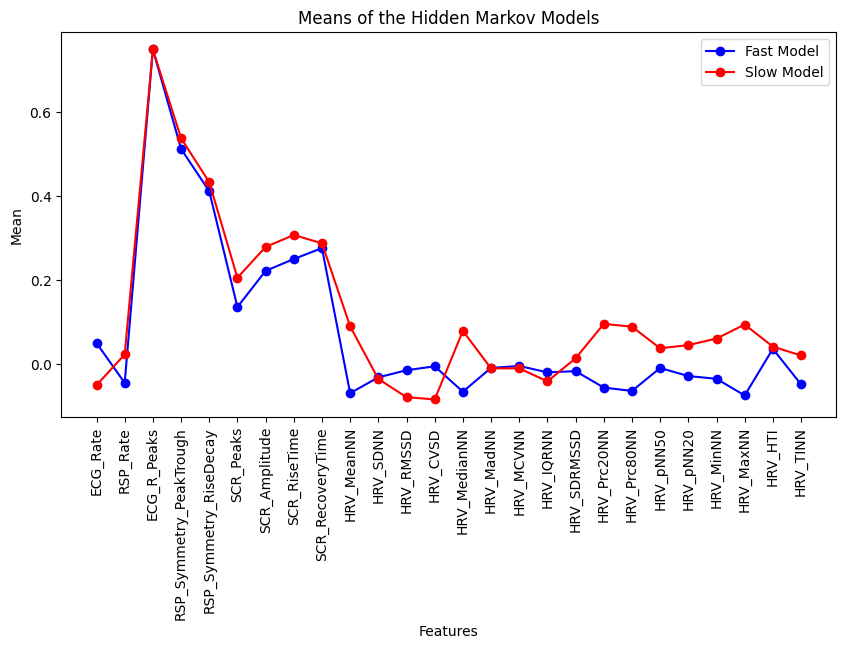

In [25]:
# plot the means
plt.figure(figsize=(10, 5))
plt.plot(range(len(features)), fast_model_means[0][0], "-o", color="blue", label="Fast Model")
plt.plot(range(len(features)), slow_model_means[0][0], "-o", color="red", label="Slow Model")
plt.title("Means of the Hidden Markov Models")
plt.xlabel("Features")
plt.ylabel("Mean")
plt.xticks(range(len(features)), features, rotation=90)
plt.legend()
plt.show()

In [ ]:
# standard deviations
slow_model_std = np.sqrt(slow_model.covars_)
fast_model_std = np.sqrt(fast_model.covars_)

In [ ]:
# state transition matrix
fast_model_transmat = fast_model.transmat_
fast_model_transmat

In [ ]:
# plot the means with standard deviations
plt.figure(figsize=(10, 5))
plt.errorbar(range(len(features)), slow_model_means[0][0], yerr=slow_model_std, fmt='-o', color="blue", label="Driving Model", alpha=0.5)
plt.errorbar(range(len(features)), fast_model_means[0][0], yerr=fast_model_std[0], fmt='-o', color="red", label="Takeover Model State 1", alpha=0.3)
plt.errorbar(range(len(features)), fast_model_means[1][0], yerr=fast_model_std[0], fmt='-o', color="red", label="Takeover Model State 2", alpha=0.3)
plt.errorbar(range(len(features)), fast_model_means[2][0], yerr=fast_model_std[0], fmt='-o', color="red", label="Takeover Model State 3", alpha=0.3)
plt.title("Standard Deviations of the Hidden Markov Models")
plt.xlabel("Features")
plt.ylabel("Standard Deviation")
plt.xticks(range(len(features)), features, rotation=90)
plt.legend()
plt.show()